# Applying RNN on IMDB Review Dataset

## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# Loading Imdb review dataset from {keras.dataset}
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
# keeping vocabulary size as 30k

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [25]:
# checking words with index 0
for i in range(25000):
    for j in X_test[i]:
        if j == 0:
            print("found zero")

In [26]:
# Merging the data
X_merged = np.concatenate((X_train, X_test), axis=0)  # Merge reviews
y_merged = np.concatenate((y_train, y_test), axis=0)  # Merge labels

# Verifying the shapes
print(f"Shape of merged data (X): {X_merged.shape}")
print(f"Shape of merged labels (y): {y_merged.shape}")

Shape of merged data (X): (50000,)
Shape of merged labels (y): (50000,)


In [27]:
# length of training and testing dataset
print(f"length of training data: {len(X_merged)}")
print(f"length of training data: {len(y_merged)}")

length of training data: 50000
length of training data: 50000


#### All the data is already tokenized

In [28]:
print(X_merged)
print(50*"-")
len(X_merged[0])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

218

In [29]:
# mapping of words index
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [30]:
# creating a list to containing length of all documents
document_list = []
for doc in X_merged:  # Iterate directly over the documents
    document_list.append(len(doc))

print(f"Average number of words: {np.average(document_list)}")
print(f"Longest documennt: {np.max(document_list)}")
print(f"Shortest documennt: {np.min(document_list)}")

Average number of words: 234.75892
Longest documennt: 2494
Shortest documennt: 7


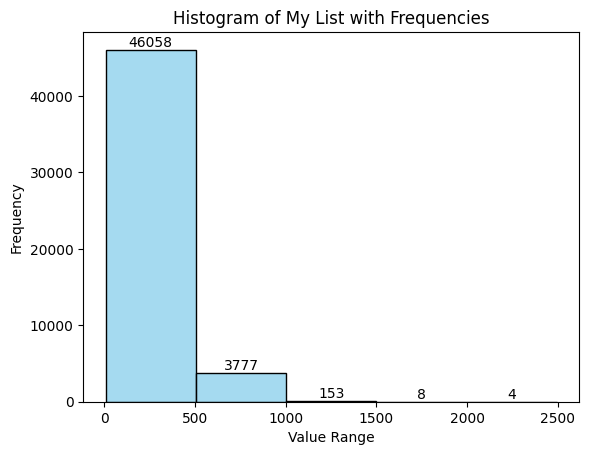

In [31]:
# Creating histogram
ax = sns.histplot(document_list, bins=5, kde=False, color='skyblue', edgecolor='black')

# Annotate frequencies on top of each bar
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (frequency)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height, int(height), ha='center', va='bottom')

# Add titles and labels
plt.title("Histogram of My List with Frequencies")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.show()


- The majority of documents have a word count ranging from `0 to 500` (approximately 460,000 documents).  
- A smaller number of documents exceed 500 words.

#### As observed, most of the document length in data is ranging between 0-500, so i will be padding the document with maxlen = 500.

In [44]:
# we will apply padding on each document to convert it into same length
X_padded = pad_sequences(X_merged, padding = "post", maxlen = 200)

In [45]:
print(X_padded.shape)
print(50*"-")
print(len(X_padded[0]))
print(50*"-")

(50000, 200)
--------------------------------------------------
200
--------------------------------------------------


In [46]:
X_padded[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

In [47]:
# splitting the data
from sklearn.model_selection import train_test_split

# Assuming `X` is your features and `y` is your target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_merged, test_size=0.3, random_state=42
)


In [48]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_tesy: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_tesy: {y_test.shape}")

shape of X_train: (35000, 200)
shape of X_tesy: (15000, 200)
shape of y_train: (35000,)
shape of y_tesy: (15000,)


#### we will apply embedding on each token in the document with some specific dimension
- input_dim=10000: The size of the vocabulary. In this case, we're using a vocabulary of 10,000 unique tokens (words).
- output_dim=64: The size of the embedding vectors. Each word will be represented by a 64-dimensional vector.
- input_length=100: The length of each input sequence. In this case, each input sequence will be 100 tokens long (e.g., 500 words in a sentence or document).

In [49]:
# creating layers for model
model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim =128, input_length = 200))
model.add(SimpleRNN(units= 128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Build the model explicitly
model.build(input_shape=(None, 200))

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# creating an instance of early stopping
earlyStopping = EarlyStopping(monitor= "val_loss", patience = 5, restore_best_weights = True)
earlyStopping

In [52]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=100,batch_size = 32,validation_split=0.2, callbacks=[earlyStopping])

Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9375 - loss: 0.1952 - val_accuracy: 0.8393 - val_loss: 0.4198
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9477 - loss: 0.1702 - val_accuracy: 0.8383 - val_loss: 0.4856
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9463 - loss: 0.1805 - val_accuracy: 0.8403 - val_loss: 0.5186
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9330 - loss: 0.2122 - val_accuracy: 0.8319 - val_loss: 0.8880
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9564 - loss: 0.1510 - val_accuracy: 0.8467 - val_loss: 0.4215


In [58]:
model.evaluate(X_test, y_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8466 - loss: 0.3945


[0.394386887550354, 0.847266674041748]

Got an accuracy of 84 percent on test data

In [57]:
# saving the model
model.save("Rnn_model.h5")

In [60]:
# saving this model locally

from google.colab import files
files.download('Rnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Testing the model with some data

In [56]:
data = "This is the best movie I’ve ever seen absolutely perfect in every way! and very good"

In [7]:
# Mapping of words to index
word_index = imdb.get_word_index()

# Example of finding word indices
word = "This is the best movie I’ve ever seen absolutely perfect in every way! and very good"
word_indices = [word_index.get(i, -1) for i in word.split()] # Use get() with default value to handle missing words.
print(f"Indices of words '{word}': {word_indices}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Indices of words 'This is the best movie I’ve ever seen absolutely perfect in every way! and very good': [-1, 6, 1, 115, 17, -1, 123, 107, 424, 401, 8, 172, -1, 2, 52, 49]


If the key `i` is *not found* in the `word_index` dictionary (meaning the word is not in the vocabulary used to train the model), then instead of causing a `KeyError`, the `get()` method returns `-1`.

In [15]:
# creating a function to get indices and applying padding
def processing_input(text):
    word_index = imdb.get_word_index()
    word_indices = [word_index.get(i, -1) for i in text.split()]
    padded_sequence = pad_sequences([word_indices], padding='post', maxlen=200)
    return padded_sequence

def predict(text):
    padded_text = processing_input(text)
    model = load_model("/content/Rnn_model.h5")
    prediction = model.predict(padded_text)
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    return sentiment, prediction[0][0]


In [16]:
word = "This is the best movie I’ve ever seen absolutely perfect in every way! and very good"
print(predict(word))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
('Positive', 0.9291809)
